In [1]:
# File: labels_analysis.ipynb -- Compare Airbnb Data By Gentrification Label
# Author: Shomik Jain
# Date: 2/02/2020

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
file = '../data/regression_data.csv'
data = pd.read_csv(file)

In [4]:
data.columns

Index(['year', 'zipcode', 'agg_count_log', 'price_log', 'person_capacity',
       'review_rating_location', 'review_length_log', 'crime_words_perc_old',
       'sentiment_neg_avg', 'lda2', 'lda3', 'lda4', 'lda5', 'lda_pca1',
       'lda_pca2', 'd2v_pca1', 'd2v_pca2', 'crime_score', 'crime_score_log',
       'race_index', 'gini_index', 'edu_bachelors', 'age_25_34',
       'square_feet_log', 'year_2012', 'year_2013', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'listings_count_log', 'gentrifying',
       'non_gentrifying', 'higher_income', 'crime_score_norm',
       'gentrification_score'],
      dtype='object')

In [5]:
data.head()

,year,zipcode,agg_count_log,price_log,person_capacity,review_rating_location,review_length_log,crime_words_perc_old,sentiment_neg_avg,lda2,...,year_2014,year_2015,year_2016,year_2017,listings_count_log,gentrifying,non_gentrifying,higher_income,crime_score_norm,gentrification_score
0,2012,10001,7.453562,5.164220,3.049,9.736,3.467076,0.025792,0.019387,0.184591,...,0,0,0,0,3.737670,0,0,1,0.532557,0.483342
1,2013,10001,7.807917,5.272543,3.120,9.739,3.417120,0.028003,0.018776,0.179155,...,0,0,0,0,3.951244,0,0,1,0.542926,0.481393
2,2014,10001,7.935945,5.320548,3.257,9.658,3.413925,0.030951,0.017506,0.188844,...,1,0,0,0,3.912023,0,0,1,0.503468,0.489998
3,2015,10001,8.485496,5.276312,3.189,9.648,3.320283,0.030951,0.016212,0.175515,...,0,1,0,0,4.262680,0,0,1,0.492122,0.493954
4,2016,10001,8.803274,5.208650,3.135,9.640,3.223529,0.044952,0.018056,0.158692,...,0,0,1,0,4.060443,0,0,1,0.435762,0.508272


In [6]:
gentrifying = data[data['gentrifying']==1]
non_gentrifying = data[data['non_gentrifying']==1]
higher_income = data[data['higher_income']==1]

data_groups = [gentrifying, non_gentrifying, higher_income, data]
data_group_labels = ['Gentrifying', 'Non-Gentrifying', 'Higher-Income', 'Citywide']
years = [2012, 2013, 2014, 2015, 2016, 2017]
graph_color = ['#5A9BD4','#F15A60','#9E67AB','k']

## Trend Analysis

In [9]:
# Yearly Trend Analysis

feature = 'agg_count_log'

data_plot = {}

for i,d in enumerate(data_groups):
    l = data_group_labels[i]
    data_plot[l] = []

    for y in years:
        curr_year = d[d['year']==y]
        if 'log' in feature:
            data_plot[l].append(np.nanmean(np.exp(curr_year[feature])))
        else:
            data_plot[l].append(np.nanmean(curr_year[feature]))
print(data_plot)

{'Gentrifying': [1079.9142857142858, 1696.0540540540533, 2412.6578947368416, 3861.975, 5002.4749999999985, 5402.414634146341], 'Non-Gentrifying': [40.77777777777778, 58.083333333333336, 127.21428571428568, 278.3529411764706, 484.05882352941165, 707.4117647058816], 'Higher-Income': [514.0188679245282, 766.1551724137931, 775.3717948717949, 1101.4086021505377, 1310.264705882353, 1441.4811320754718], 'Citywide': [674.298969072165, 1008.2990654205604, 1184.1615384615384, 1744.2800000000002, 2150.7861635220124, 2355.621951219512]}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


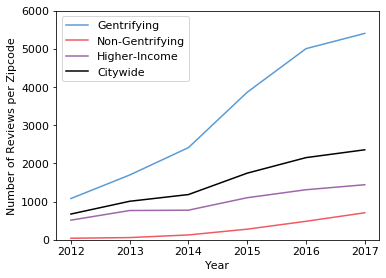

In [10]:
# Trend Plot

plt.rcParams.update({'font.size': 11})

plt.rcParams["figure.figsize"] = [5.5,4]
fig, ax = plt.subplots()

for k,v in data_plot.items():
    plt.plot(years, v, label=k, color=graph_color[data_group_labels.index(k)])

ax.set_xlabel('Year', fontsize=11)
ax.set_ylabel('Number of Reviews per Zipcode', fontsize=11)
plt.ylim(0, 6000)

plt.legend(loc='upper left', fontsize=11)

fig.tight_layout() 
plt.savefig('reviews_trend.eps', format='eps', dpi=1000)

## Feature Analysis

In [15]:
features = [
'listings_count_log',
'agg_count_log',
'price_log',
'review_rating_location',
'person_capacity',
'square_feet_log'
]

pred=['gentrification_score', 'edu_bachelors', 'age_25_34', 'race_index', 'gini_index', 'crime_score_log']

In [17]:
for f in features+pred:
    print()
    print(f)
    for i,d in enumerate(data_groups):
        if 'log' in f:
            print(data_group_labels[i], np.nanmean(np.exp(d[f])))
        else:
            print(data_group_labels[i], np.nanmean((d[f])))
    
    if 'log' in f:
        print(stats.ttest_ind(np.exp(gentrifying[f]), np.exp(non_gentrifying[f])))
        print(stats.f_oneway(np.exp(gentrifying[f]), np.exp(non_gentrifying[f]), np.exp(higher_income[f])))
    else:
        print(stats.ttest_ind((gentrifying[f]), (non_gentrifying[f])))
        print(stats.f_oneway((gentrifying[f]), (non_gentrifying[f]), (higher_income[f])))


listings_count_log
Gentrifying 63.450216450216445
Non-Gentrifying 13.930232558139538
Higher-Income 26.846938775510203
Citywide 35.94795539033457
Ttest_indResult(statistic=10.008743909993049, pvalue=1.1734806155870706e-20)
F_onewayResult(statistic=116.36872194200112, pvalue=4.112257762240808e-45)

agg_count_log
Gentrifying 3326.0129870129863
Non-Gentrifying 323.62790697674404
Higher-Income 1063.334693877551
Citywide 1632.187112763321
Ttest_indResult(statistic=7.051718790354857, pvalue=1.1242391581282067e-11)
F_onewayResult(statistic=74.92330247016179, pvalue=1.453982647244317e-30)

price_log
Gentrifying 105.6577619047619
Non-Gentrifying 68.35297674418604
Higher-Income 115.67988775510204
Citywide 107.76758859975217
Ttest_indResult(statistic=9.131281013862045, pvalue=8.395137313698464e-18)
F_onewayResult(statistic=31.265656484294418, pvalue=8.388004923666919e-14)

review_rating_location
Gentrifying 8.960230844912664
Non-Gentrifying 8.610077187347537
Higher-Income 9.252439364207222
Citywi